# Numerical Integration basics with python
The goal of this lesson is to reviews some numerical integration ideas from calculus and see how to implement these in python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Fresnel integral
Approximate $\displaystyle \int_0^1 \cos(x^2)~dx$.

This is a [Fresnel integral](https://en.wikipedia.org/wiki/Fresnel_integral). Integrals like this appear in optics and signal processing.

L5 = 0.9261
R5 = 0.8801
0.7701511529340699


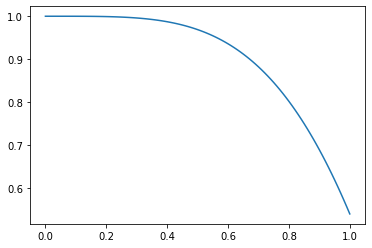

In [16]:
def fres(x):
    return(np.cos(x**2))

xs = np.linspace(0,1,101)
plt.plot(xs,fres(xs));

#calculate L10 approx
h = 0.1
#x = np.array([0.,0.2,0.4,0.6,0.8])
x = np.linspace(0,.9,10)
f = fres(x)  #function values
L5 = h*np.sum(f)
print(f"L5 = {L5:2.4f}")

#calcuate R5
x = np.linspace(0.1,1,10)
f = fres(x)  #function values
R5 = h*np.sum(f)
print(f"R5 = {R5:2.4f}")

# 1 trapezoid
T1 = 0.5*1.*(fres(0)+fres(1))
print(T1)


In [17]:
#calculate T10
h = 0.1
x = np.linspace(0,1,11)

T10 = 0
for i in range(10):
    T10 += 0.5*h*( fres(x[i]) + fres(x[i+1]) )

print(T10)


0.9031217571234075


### Basic case with error calculation
First we'll look at approximating $\ln(10) = \int_1^{10} \frac{1}{x} dx$.
We'll use 9 subintervals so $h = \frac{b-a}{n} = \frac{10-1}{9} = 1$.

In [18]:
#see notes pdf


### How to calculate number of intervals?

**Theorem** Let $f(x)$ be a continuous function over $[a,b]$, having a second derivative $f''(x)$ over this interval. If $M$ is the maximum value of $|f''(x)|$ over $[a,b]$, then the upper bound for the error in using $n$ intervals with the midpoint rule, $M_n$, or the trapezoid rule, $T_n$, to approximate $\displaystyle \int_a^b f(x)~dx$ are given by

$$\mbox{Error with } M_n \leq \frac{M(b-a)^3}{24n^2}$$

and 

$$\mbox{Error with } T_n \leq \frac{M(b-a)^3}{12n^2}$$

In [19]:
np.sqrt(2*9**3/12/0.01)

110.22703842524301

In [20]:
x = np.linspace(1,10,112)
h = (10-1)/(112-1)
n = 111
Tn = (h/2)*(1/x[0])

for i in range(1,111):
    Tn += (h/2)*2*(1/x[i])

Tn += (h/2)*(1/x[n])

print(Tn)


2.303127100679725


In [2]:
# implement trapezoid rule in general

def trapezoid_rule(func,a,b,n):
    #implement trapezoid rule with n intervals to approximate integral of func from a to b
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    Tn = func(x[0])
    for i in range(1,n):
        Tn += 2*func(x[i])

    Tn += func(x[n])

    Tn *= h/2
    return(Tn)
    



In [4]:
np.sqrt(10**7 / 2)

2236.06797749979

In [5]:
def func(x):
    return(np.sin(x*x))

I = trapezoid_rule(func,0,1,2237)
print(I)

0.3102683197184547


In [14]:
def f(x):
    return(1./x)

print(trapezoid_rule(f,1,10,111))

print(trapezoid_rule(fres,0,1,10))

2.3031271006797254
0.9031217571234074


### There is a better way to implement - dot product!
Note that $T = \frac{h}{2} \left( f(x_0) + 2f(x_1) + 2f(x_2) + ... + 2f(x_{n-1}) + f(x_n) \right)$, but the term in parentheses can be thought of as the dot product between the vectors,
$$\vec{w} = \begin{bmatrix}1\\2\\2\\:\\:\\2\\1\end{bmatrix}, \vec{F} = \begin{bmatrix}f(x_0)\\f(x_1)\\f(x_2)\\:\\:\\f(x_{n-1})\\f(x_n)\end{bmatrix}.$$
This allows us to construct a new way to program the dot product that lets us take advantage of some of python's (and other languages) built-in capabilities.

In [15]:
def trapezoid_rule_dot(func,a,b,n):
    #implement trapezoid rule with n intervals to approximate integral of func from a to b
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    w = np.ones(n+1) # Construct the weights w = [1 2 2 2 ... 2 2 1]
    w[1:-1] = 2 
    Tn = (h/2)*np.dot(func(x),w)
    return(Tn)

In [16]:
print(trapezoid_rule(f,1,10,111))
print(trapezoid_rule_dot(f,1,10,111))

print(trapezoid_rule(fres,0,1,10))
print(trapezoid_rule_dot(fres,0,1,10))

2.3031271006797254
2.3031271006797245
0.9031217571234074
0.9031217571234076


### Toughness calculation
Consider the tensile test data contained
in hair_ss.csv. The integral of the stress–strain curve is known as the
toughness, $\displaystyle U_T = \int_0^{\epsilon_f} \sigma~d\epsilon$ where $\epsilon_f$ is the failure strain. Toughness has units of energy and can be interpreted as how much energy a material can mechanically “absorb” before breaking. Calculate the toughness of the material tested in the above data file.

48.950767636277746


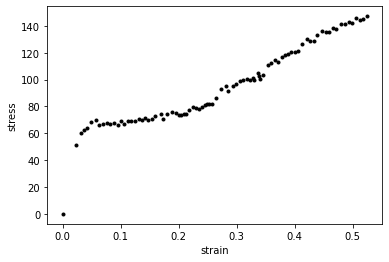

In [33]:
from scipy.integrate import trapz

hairdata = np.loadtxt('./hair_ss.csv',delimiter=',',skiprows=1)
stress = hairdata[:,0]
strain = hairdata[:,1]

plt.plot(strain[0:-2],stress[0:-2],'k.');
plt.xlabel('strain');
plt.ylabel('stress');

toughness = trapz(stress[0:-2],strain[0:-2])

print(toughness)


### Probability distribution calculation - median failure time - convex Weibull combination pdf 
During a project for Kimberly-Clark my collaborators and I had to model the downtime of a diaper packaging machine. The machine would generally break in two different ways. Sometimes the machine would just jam and the fix was quick, and sometimes a more serious break occured that took a while to fix. A probability density function for this is given by
$$f_{r}(x) = \alpha\left(\frac{1}{t \sigma_{r} \sqrt{2 \pi}}e^{- \frac{(\ln(t) - \mu_{r})^2}{2 \sigma_{r} ^2}}\right) + (1 - \alpha)\left[\frac{\beta}{\eta} \left(\frac{t}{\eta}\right)^{\beta - 1} e^{-\left(\frac{t}{\eta}\right)^{\beta}}\right].$$

|parameter|value|
|---|---|
|$\alpha$|0.5|
|$\beta$|10|
|$\sigma_r$ | 0.83 |
|$\mu_r$|log(30)
|$\eta$|1800|

Find the probability a failure results in a downtime less than 10 minutes.

In [34]:
alpha = 0.5
beta = 10
sigmar = 0.83
mur = np.log(30)
eta = 1800

def pdf(t):
    if t <= 0:
        return(0)
    else:
        term1 = (1./(t*sigmar*np.sqrt(2*np.pi)))*np.exp(-(np.log(t)-mur)**2/(2.*sigmar**2))
        term2 = (beta/eta)*(t/eta)**(beta-1)*np.exp(-(t/eta)**beta)
        return(alpha*term1 + (1-alpha)*term2)



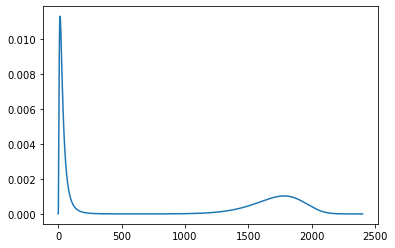

In [36]:
ts = np.linspace(0,2400,10001)
fs = np.copy(ts)
for i in range(0,len(fs)):
    fs[i] = pdf(ts[i])

plt.plot(ts,fs);

In [39]:
prob = trapezoid_rule(pdf,0,1800,6000)

print(prob)

0.8160600723070502


### How to generate a random number from this distribution? (or any custom pdf)

In [49]:
np.random.random()
from scipy.optimize import fsolve

def getrand_pdf(pfunc,a):
    #generates a random number from an arbitrary pdf function called pfunc
    #a is the left side of the support of the pfunc
    
    r = np.random.random() #generate random number between 0 and 1
    
    def cdf(x):
        return(trapezoid_rule(pfunc,a,x,1000))
    
    def f(x):
        return(cdf(x)-r)
    
    sol = fsolve(f,10)
    
    return(sol)

In [50]:
for i in range(0,10):
    print(getrand_pdf(pdf,0))
    

[22.00212897]
[94.77442589]
[1692.25724135]
[191.89139528]
[42.525909]
[1422.7751501]
[41.83142777]
[1400.58099607]
[1361.25556397]
[8.75673054]


### Corrugation example
Corrugated iron is used extensively throughout the world as a versatile building material.
Bending the material into a regular wave pattern gives it greater strength than if a 
a flat sheet is used. This panel has a finished width of 106.7 cm, a period of 10.67 cm (distance
from the top of each wave to the top of the next), and has amplitude 1.35 cm (height
from the mid-point of the wave to the top of a crest). How wide should the flat sheet be to give us a corrugated sheet of width 106.7 cm?

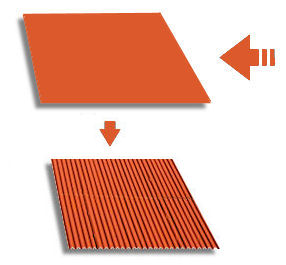

In [18]:
def fc(x):
    A = 1.35
    p = 10.67
    f = 2.*np.pi/p
    output = np.sqrt( 1.  +   (A*f*np.cos(f*x))**2)
    return(output)

a = 0
b = 106.7

L = trapezoid_rule(fc,a,b,1000)

print(L)
    

121.95527220873171


### Corn development
The development rate of many organisms shows an approximately linear dependence on temperature. Biologists measure the development of such organisms in terms of "degree-days." These accumulate over time at a rate equal to the difference between the current temperature and a threshold temperature $T_m$. This temperature varies among species, as does the total number of degree-days required for full development.

Corn is a plant species where development is measured in degree-days. The threshold temperature for most varieties of corn grown in the US is 50 degrees F. The yield and number of degree-days varies greatly for different varieties of corn and often leads to colloquial names for different varieties, e.g. 85-day corn, 110-day corn, etc. You can see a running total of the accumulated degree-days for the year at the Wisconsin Corn Growers Association page. 

- Construct an integral to represent the total number of degree-days in $t_1$ days. This integral represents a function 
$F(t_1)$ that contains the parameter $T_m$ and the temperature function $T(t)$ in addition to the independent variable $t_1$.
- Assume that corn accumulates GDD if the temperature is above 50 degrees F and this accumulation is limited by moisture stress if the temperature rises above 86 degrees F. Thus if the temperature rises to 90 degrees F, we treat all degrees above 86 as equivalent to 86. Consider two new functions max and min. max(a,b) = a if a > b and b otherwise. min(c,d) = c if c < d and d otherwise. Use these two new functions and write a new integral describing the development of corn.
- Calculate the GDD accumulated in 10 days if the temperature can be approximated with the functions below.
  - $T(t) = 60 + 10\sin(\pi t/12)$
  - $T(t) = 75 + 13\sin(\pi t/12)$
  - $T(t) = 55 + 10\sin(\pi t/12)$

In [53]:
def gdd(T):
    #calculates the GDD integral using Temperature function T
    def f(t):
        #T = 60 + 10*np.sin(np.pi*t/12)
        return( np.max([np.min([T(t),86])-50,0]) )
    gddvalue = trapezoid_rule(f,0,10,240)
    return(gddvalue)

def T1(t):
    return(60 + 10*np.sin(np.pi*t/12))

def T2(t):
    return(75 + 13*np.sin(np.pi*t/12))

print(gdd(T2))

336.9641102838192


$$ GDD(t_1) = \int_0^{t_1} max(min(T(t),86)-50,0)~dt  $$

### Simpon's Rule? if time